Training the churn prediction model

In [12]:
import pandas as pd
import numpy as np
import joblib
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load Preprocessed Data (optional)
# If you saved cleaned features from notebook 01, load them here:
# Otherwise assume you're importing them from your pipeline directly.

X_train_scaled = joblib.load('../app/model/X_train_scaled.pkl')  # Optional if saved
X_test_scaled = joblib.load('../app/model/X_test_scaled.pkl')
y_train = joblib.load('../app/model/y_train.pkl')
y_test = joblib.load('../app/model/y_test.pkl')

In [14]:
# Define and Train Model
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train_scaled, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [15]:
# Evaluate Model
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
y_pred = model.predict(X_test_scaled)

auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

AUC-ROC: 0.8344

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       828
           1       0.60      0.50      0.55       299

    accuracy                           0.78      1127
   macro avg       0.72      0.69      0.70      1127
weighted avg       0.77      0.78      0.77      1127



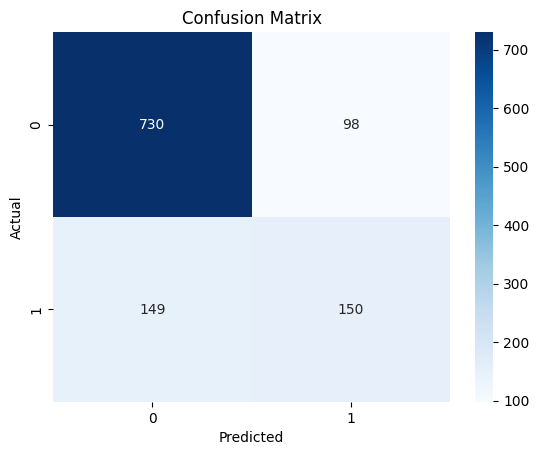

In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

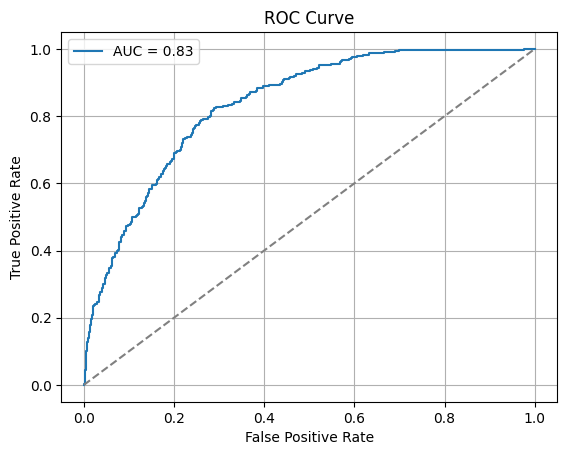

In [16]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Save Model
joblib.dump(model, '../app/model/model.pkl')
print("Model saved as model.pkl")

Model saved as model.pkl
